In [1]:
# Import modules:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import the data
user_data = pd.read_csv("user_data.csv")
user_data.head()

,city,education,age
0,"Brooklyn, NY",college,31
1,"Brooklyn, NY",graduate degree,31
2,"Brooklyn, NY",graduate degree,32
3,"Brooklyn, NY",college,37
4,"Brooklyn, NY",college,21


In [4]:
# Select increasingly larger samples: 
extra_small_sample = user_data["age"][:10]
small_sample = user_data["age"][:50]
medium_sample = user_data["age"][:100]
large_sample = user_data["age"][:200]

# Calculate the mean of those samples: 
extra_small_sample_mean_age = np.mean(extra_small_sample)
small_sample_mean_age = np.mean(small_sample)
medium_sample_mean_age = np.mean(medium_sample)
large_sample_mean_age = np.mean(large_sample)
population_mean_age = np.mean(user_data["age"])

# Print the means of the samples
print("Extra Small Sample Mean Age: " + str(extra_small_sample_mean_age))
print("Small Sample Mean Age: " + str(small_sample_mean_age))
print("Medium Sample Mean Age: " + str(medium_sample_mean_age))
print("Large Sample Mean Age: " + str(large_sample_mean_age))
print("\nPopulation Mean Age: " + str(population_mean_age))

Extra Small Sample Mean Age: 29.0
Small Sample Mean Age: 29.24
Medium Sample Mean Age: 29.04
Large Sample Mean Age: 29.35

Population Mean Age: 29.427860696517413


In [5]:
# Import the data
pop_data = pd.read_csv("pop_data.csv")
pop_data.head()

,city,population_proper
0,"Prairie Ridge, WA",NaN
1,"Edison, WA",NaN
2,"Packwood, WA",NaN
3,"Wautauga Beach, WA",NaN
4,"Harper, WA",NaN


In [6]:
# Create data frames by merging the tables and adding location column:
# the pd.merge will use the 'key' column as a default, which in this case is 'city'
new_df = pd.merge(user_data, pop_data)
new_df.head(10)

,city,education,age,population_proper
0,"Brooklyn, NY",college,31,2629150.0
1,"Brooklyn, NY",graduate degree,31,2629150.0
2,"Brooklyn, NY",graduate degree,32,2629150.0
3,"Brooklyn, NY",college,37,2629150.0
4,"Brooklyn, NY",college,21,2629150.0
5,"Austin, TX",college,25,947890.0
6,"Austin, TX",graduate degree,22,947890.0
7,"Oakland, CA",graduate degree,29,420005.0
8,"Pittsburgh, PA",college,29,303625.0
9,"Pittsburgh, PA",college,27,303625.0


In [7]:
# there isn't yet a "location" column in new_df, so the first line below will create it
# if the population_proper is less than 100,000, "rural" will be set for that row in the "location" column
new_df.loc[new_df.population_proper < 100000, "location"] = "rural"
# if the population_proper is greater than or equal to 100,000, "urban" will be set for that row in the "location" column
new_df.loc[new_df.population_proper >= 100000, "location"] = "urban"
new_df.head(20)

,city,education,age,population_proper,location
0,"Brooklyn, NY",college,31,2629150.0,urban
1,"Brooklyn, NY",graduate degree,31,2629150.0,urban
2,"Brooklyn, NY",graduate degree,32,2629150.0,urban
3,"Brooklyn, NY",college,37,2629150.0,urban
4,"Brooklyn, NY",college,21,2629150.0,urban
5,"Austin, TX",college,25,947890.0,urban
6,"Austin, TX",graduate degree,22,947890.0,urban
7,"Oakland, CA",graduate degree,29,420005.0,urban
8,"Pittsburgh, PA",college,29,303625.0,urban
9,"Pittsburgh, PA",college,27,303625.0,urban


In [8]:
# Set styles for the seaborn data visualizations
sns.set_style("darkgrid")
sns.set_palette("bright")
sns.despine()
plt.close()

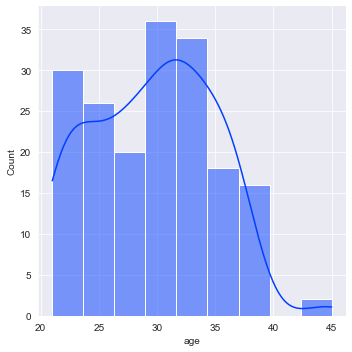

In [9]:
# Histogram:
age = new_df["age"]
sns.displot(data=age, kde=True)
plt.show()
plt.close()

In [10]:
# Find the mean age of urban and rural users: 
location_mean_age = new_df.groupby("location").age.mean()
location_mean_age.head()

location
rural    31.142857
urban    29.609195
Name: age, dtype: float64

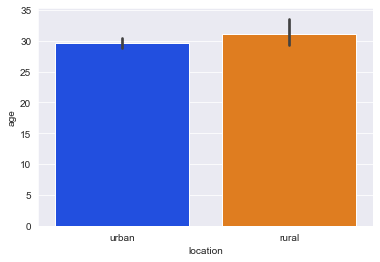

In [11]:
# Barplot Code:
sns.barplot(
    data=new_df,
    x= "location",
    y= "age"
)
plt.show()
plt.close()

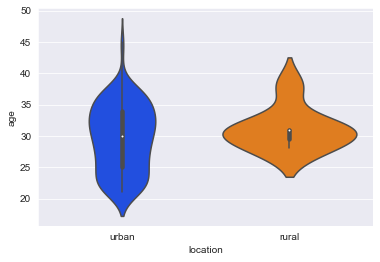

In [12]:
# Paste violinplot code:
sns.violinplot(data=new_df, x="location", y="age")
plt.show()
plt.close()

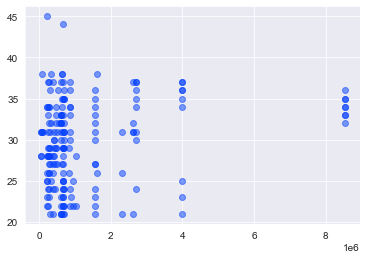

In [13]:
# Paste code for scatter plot:
x = new_df["population_proper"]
y = new_df["age"]
# alpha value affects the transparency of the dots
plt.scatter(x,y,alpha=0.5)
plt.show()
plt.close()

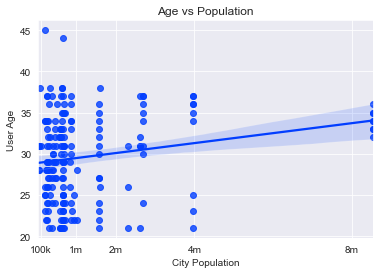

In [14]:
# Linear Regression:
ax = plt.subplot(1, 1, 1)
ax.set_xticks([100000, 1000000, 2000000, 4000000, 8000000])
ax.set_xticklabels(["100k", "1m", "2m","4m", "8m"])
sns.regplot(x="population_proper", y="age", data=new_df)
ax.set_xlabel("City Population")
ax.set_ylabel("User Age")
plt.title("Age vs Population")
plt.show()
plt.close()